In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

In [9]:
import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [65]:
x_train.shape

(60000, 28, 28)

In [0]:
# make the hot enconde
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)


ct = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), [0])],
    remainder='passthrough'
)

y_test = ct.fit_transform(y_test).toarray()
y_train = ct.fit_transform(y_train).toarray()

Text(0.5, 1.0, 'Classe: 5')

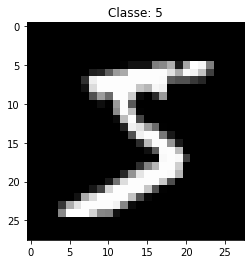

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap='gray')
plt.title('Classe: ' + str( np.argmax(y_train[0] ) ))

Text(0.5, 1.0, 'Classe: 0')

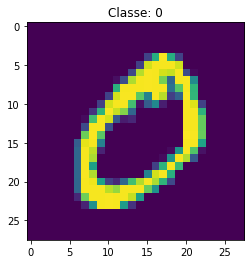

In [57]:
plt.imshow(x_train[1])
plt.title('Classe: ' + str( np.argmax(y_train[1] ) ))

In [0]:
x_batch, y_batch = 128, 64

In [67]:
# 28 * 28 (shape image) -> 784px
neurons_input = x_train.shape[1] * x_train.shape[2] # 784 neurons
neurons_input

784

In [0]:
# Formula to determine the total of neurons to layer:
# total_neurons = (number_features_layer_input + number_features_layer_out) / 2
neurons_first_layer_hidden = int(x_train.shape[1] * x_train.shape[2] + y_train.shape[1] / 2) 
neurons_second_layer_hidden = neurons_first_layer_hidden
neurons_third_layer_hidden = neurons_first_layer_hidden

# layer out
neurons_layer_out = y_train.shape[1]

# architecture neural network to mnist dataset
# 784 -> 397 -> 397 -> 397 -> 10

In [0]:
weights = {
    'hidden1': tf.Variable(tf.random_normal([neurons_input, neurons_first_layer_hidden])),
    'hidden2': tf.Variable(tf.random_normal([neurons_first_layer_hidden, neurons_second_layer_hidden])),
    'hidden3': tf.Variable(tf.random_normal([neurons_second_layer_hidden, neurons_third_layer_hidden])),
    'out': tf.Variable(tf.random_normal([neurons_third_layer_hidden, neurons_layer_out]))
}

In [0]:
bias = {
    'hidden1': tf.Variable(tf.random_normal([neurons_first_layer_hidden])),
    'hidden2': tf.Variable(tf.random_normal([neurons_second_layer_hidden])),
    'hidden3': tf.Variable(tf.random_normal([neurons_third_layer_hidden])),
    'out': tf.Variable(tf.random_normal([neurons_layer_out]))
}

In [0]:
x_placeholder = tf.placeholder('float', [None, neurons_input])
y_placeholder = tf.placeholder('float', [None, neurons_layer_out])

In [0]:
def mlp(x, weight, bias):
  layer_hidden_1 =  tf.nn.relu( tf.add( tf.matmul(x, weight['hidden1']), bias['hidden1'] ) )
  layer_hidden_2 =  tf.nn.relu( tf.add( tf.matmul(layer_hidden_1, weight['hidden2']), bias['hidden2'] ) )
  layer_hidden_3 =  tf.nn.relu( tf.add( tf.matmul(layer_hidden_2, weight['hidden3']), bias['hidden3'] ) )
  layer_out = tf.add( tf.matmul(layer_hidden_3, weight['out']), bias['out'] )
  return layer_out

In [0]:
model = mlp(x_placeholder, weights, bias)

# cross entropy make the calculum better than the mean square error calculation in deep learning scenaries
error = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits= model, labels = y_placeholder) )
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(error)